# Load Data

In [1]:
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-red.csv'

import pandas as pd
from pandas import DataFrame

wdf = pd.read_csv(url, sep=';')
wdf

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5


# Investigate Data

In [2]:
wdf.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


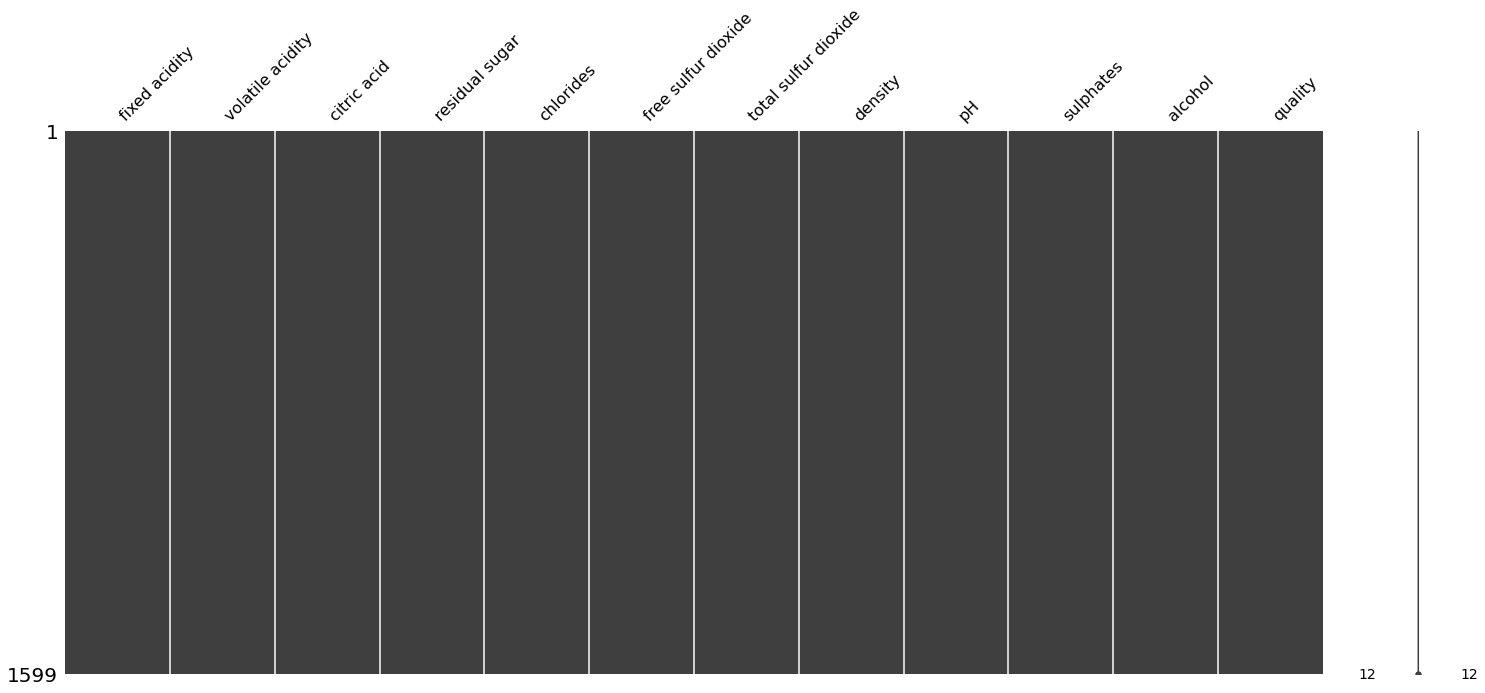

In [3]:
#Check for missing data
import missingno as msno

msno.matrix(wdf)

In [4]:
wdf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


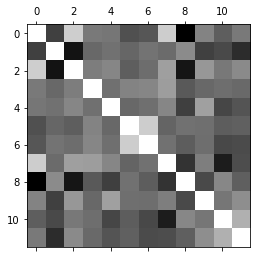

In [5]:
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

plt.matshow(wdf.corr(), cmap=plt.cm.gray)
plt.show()  #white represents highly correlated

#### Use Pandas Scatter matrix to see the data. 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x12EF23B8>,
      dtype=object)

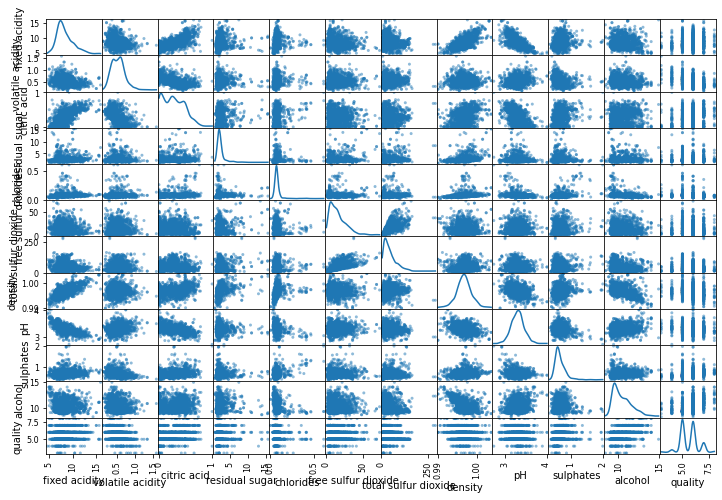

In [6]:
import pandas.plotting as pdp
pdp.scatter_matrix(wdf, figsize=(12,8), diagonal='kde')

As you can see, the combined graphs are pretty much unreadable, but you do get an idea on the type of correlation you are dealing with. 

The scatters show that regression is not going to work. 


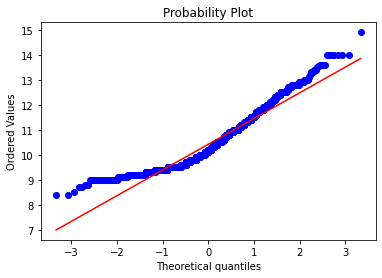

In [7]:
import numpy as np
import pylab
import scipy.stats as stats
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

stats.probplot(wdf['alcohol'], dist='norm', plot=pylab)
pylab.show()

# Split Data in Training, Test and Validation set

In [8]:
import numpy as np
y = wdf['quality']
X = wdf.drop('quality', axis=1)

#use Standard Scaler 
from sklearn.preprocessing import StandardScaler
std_scaler = StandardScaler()
X_Scaled = std_scaler.fit_transform(X)

In [9]:
from sklearn.model_selection import train_test_split

X_train_val, X_test, y_train_val, y_test = train_test_split(X_Scaled, y, test_size =159, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size= 159, random_state= 42)


# Model Selection
### Due to the large number of features it may be worth trying Linear Regression with Elastic Net with Cross Validation

In [10]:
from sklearn.linear_model import ElasticNetCV
import numpy as np

elastic_regressor = ElasticNetCV(random_state=42, l1_ratio=[0.02, 0.03, 0.4],alphas = [0.06,0.07, 0.08, 0.09],
                                 cv=3, verbose=0, n_jobs=-1)

#fit model to train data
elastic_regressor.fit(X_train, y_train)

#score returns the coefficient of determination, R^2, values closer to 1 implies a good prection
print('Traiing Data Score: ',elastic_regressor.score(X_train, y_train))
print('Validation Data Score: ',elastic_regressor.score(X_val, y_val))

Traiing Data Score:  0.35423975257276397
Validation Data Score:  0.32138988666658186


### Logistical Regression with Cross Validation

In [11]:
from sklearn.linear_model import LogisticRegressionCV

log_cv = LogisticRegressionCV(random_state=42, n_jobs=-1, verbose=0, Cs=[2.5, 3, 4])
log_cv.fit(X_train, y_train)

print('Training Data Score: ',log_cv.score(X_train, y_train))
print('Validation Data Score: ',log_cv.score(X_val, y_val))

Training Data Score:  0.6065573770491803
Validation Data Score:  0.6289308176100629


##### A lot better results with Logistic Regression, 

### Decison tree

In [12]:
from sklearn.tree import DecisionTreeRegressor

dec_tree = DecisionTreeRegressor(random_state=42, max_depth=3)


dec_tree.fit(X_train, y_train)

#.score() method returns mean accuracy of the data.
print('Training Data Score: ',dec_tree.score(X_train, y_train))
print('Validation Data Score: ',dec_tree.score(X_val, y_val))

Training Data Score:  0.32465683711537807
Validation Data Score:  0.19232057105662115


##### As expected, 1 tree gives a huge bias and variance error.  

### Random Tree Regressor with Grid Search to find the best parameters

In [13]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV

rand_tree = RandomForestRegressor(random_state=42, verbose=1, n_jobs=-1)
params_grid = {'n_estimators' : [155, 160, 170], 'max_features': ['sqrt']}#values have been changed following multiple runs

grid_forest = GridSearchCV(rand_tree, params_grid, n_jobs=-1, cv=5)
grid_forest.fit(X_train, y_train)

#.score() method returns mean accuracy of the data.
print('Training Data Score: ',grid_forest.score(X_train, y_train))
print('Validation Data Score: ',grid_forest.score(X_val, y_val))

grid_forest.best_estimator_

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  42 tasks      | elapsed:    0.0s


Training Data Score:  0.9285243845490926
Validation Data Score:  0.4717269407046694


[Parallel(n_jobs=-1)]: Done 160 out of 160 | elapsed:    0.4s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 160 out of 160 | elapsed:    0.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 160 out of 160 | elapsed:    0.0s finished


RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=None, max_features='sqrt', max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=1,
                      min_samples_split=2, min_weight_fraction_leaf=0.0,
                      n_estimators=160, n_jobs=-1, oob_score=False,
                      random_state=42, verbose=1, warm_start=False)

#### The bias error has dropped but variance error has increased, thus, generalization is poor for new instances. 

### Feature Analysis 

In [14]:
features = grid_forest.best_estimator_.feature_importances_

In [15]:
sorted(zip(features, X.columns), reverse=True)

[(0.20509715930675848, 'alcohol'),
 (0.1341243553471259, 'sulphates'),
 (0.12543742078564904, 'volatile acidity'),
 (0.0793056921170383, 'total sulfur dioxide'),
 (0.07884459951439603, 'density'),
 (0.07265286653483397, 'citric acid'),
 (0.0670619645354726, 'chlorides'),
 (0.06298519003118377, 'fixed acidity'),
 (0.06070842093248836, 'residual sugar'),
 (0.06061157886683246, 'pH'),
 (0.05317075202822098, 'free sulfur dioxide')]

#####  The features Alcohol, Sulphates and Volatile Acidity impact the quality, y, the most.

##### We are overfitting the training set, hence the bad score on the validation set.

### Gradient Boosting 

In [16]:
from sklearn.ensemble import GradientBoostingRegressor

grad_reg = GradientBoostingRegressor(random_state=42)

params_grid = {'n_estimators' : [180, 185, 190], 'max_features': [3, 4, 5, 6, 7], 'learning_rate': [0.03, 0.035, 0.04]}


grid_boost = GridSearchCV(grad_reg, params_grid, n_jobs=-1, cv=5)
grid_boost.fit(X_train, y_train)

print('Training Data Score: ',grid_boost.score(X_train, y_train))
print('Validation Data Score: ',grid_boost.score(X_val, y_val))
print(grid_boost.best_params_)

Training Data Score:  0.5822359440575109
Validation Data Score:  0.4319404875437959
{'learning_rate': 0.04, 'max_features': 5, 'n_estimators': 185}


### SVM  with Grid Search to find the best parameters

In [17]:
from sklearn.svm import SVR

svr = SVR()

params_grid = {'kernel' : ['rbf', 'poly'], 'degree': [1,3], 'C': [1, 3, 10, 30], 'epsilon': [0.01, 0.03, 0.1, 0.3]}


grid_svr = GridSearchCV(svr, params_grid, n_jobs=-1, cv=5)
grid_svr.fit(X_train, y_train)

print('Training Data Score: ',grid_svr.score(X_train, y_train))
print('Validation Data Score: ',grid_svr.score(X_val, y_val))
print(grid_svr.best_params_)

Training Data Score:  0.5403690213416841
Validation Data Score:  0.34256622612195353
{'C': 1, 'degree': 1, 'epsilon': 0.3, 'kernel': 'rbf'}


#### Training 5 models
<li>Elastic Net
<li>Logstic Regression
<li>Random Forest
<li>Gradient Boosting
<li>Support Vector Machine Regressor </li>

We can conclude that the Random Forest and Logstic Regression fits the training data best with the highest Coefficient of Determination Value. Random Forest gives a high variance error but Logstic Regression gives both a bias and variance error. Since the number of instances is not extensive we cannot rely on the validation data score, so it may be worth using the test data score to conclude which model to pick. 

In [18]:
best_forest_grid = grid_forest.best_estimator_
print('Random Forest Test Data Score: ',best_forest_grid.score(X_test, y_test))

print('Logstical Regression Test Data Score: ',log_cv.score(X_test, y_test))

Random Forest Test Data Score:  0.5446297839813341
Logstical Regression Test Data Score:  0.5849056603773585


[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  42 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 160 out of 160 | elapsed:    0.0s finished


#### There is very little difference in the test scores for each model. We will carry on using the Random Forest. 

## Use TSNE to Visualise the clusters

In [19]:
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=42)
X_reduced_tsne = tsne.fit_transform(X)

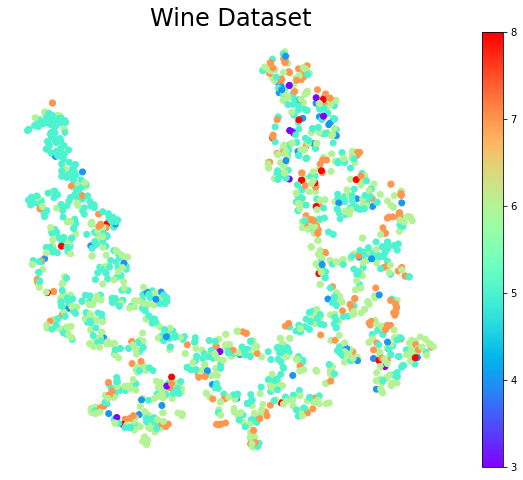

In [20]:
plt.figure(figsize= (10,8))
plt.title('Wine Dataset', fontsize=24)
plt.scatter(X_reduced_tsne[:, 0], X_reduced_tsne[:,1], c=y,cmap='rainbow')
plt.axis('off')
plt.colorbar()


### PCA
Maintain a 95% variance

In [21]:
from sklearn.decomposition import PCA

pca = PCA(n_components=0.95)

X_reduced = pca.fit_transform(X) 


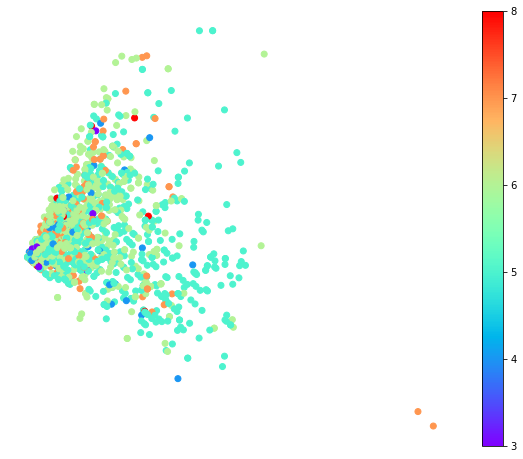

In [22]:
plt.figure(figsize= (10,8))
plt.scatter(X_reduced[:, 0], X_reduced[:,1], c=y,cmap='rainbow')
plt.axis('off')
plt.colorbar()

#### PCA does not yield a good result

# Multi-dimensional Scaling (MDS)

In [23]:
from sklearn.manifold import MDS

mds = MDS(n_components= 2 , random_state=42, verbose=1)
X_reduced_mds = mds.fit_transform(X)

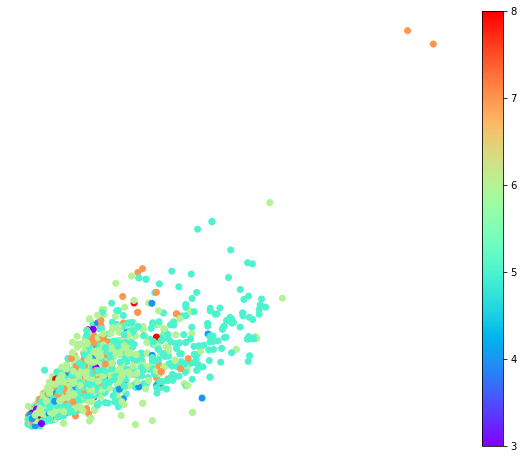

In [24]:
plt.figure(figsize=(10,8))
plt.scatter(X_reduced_mds[:,0], X_reduced_mds[:, 1], c= y, cmap='rainbow')
plt.axis('off')
plt.colorbar()
plt.show()

# TSNE Wins

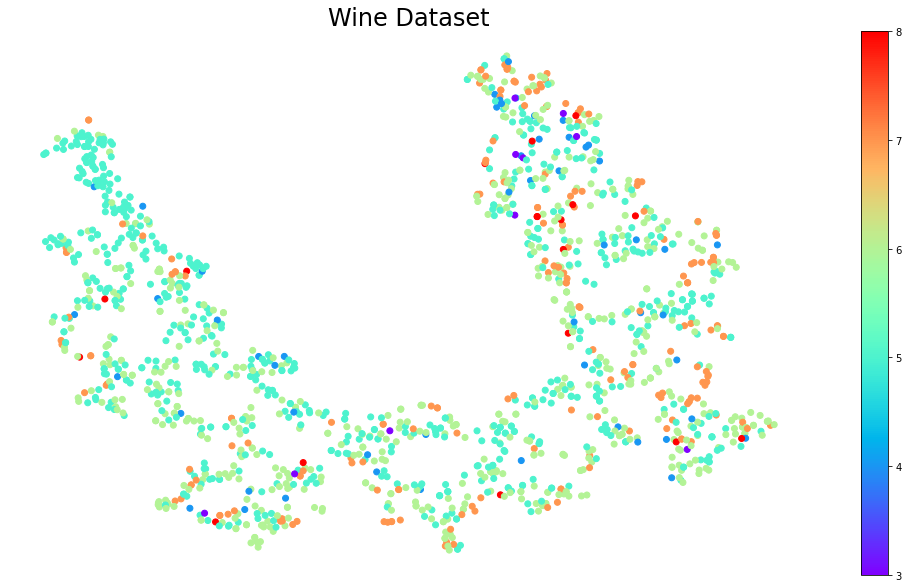

In [25]:
plt.figure(figsize= (18,10))
plt.title('Wine Dataset', fontsize=24)
plt.scatter(X_reduced_tsne[:, 0], X_reduced_tsne[:,1], c=y,cmap='rainbow')
plt.axis('off')
plt.colorbar()

#### We can see that there is no distinct cluster but the Wines with a higher quality tend to be closer together, implying that they share some feature similarities, which was confirmed by the Random Forest Regressor.  

If I were an Oenologist, I would attempt to find the exact concentration of each important feature. This will give me a wine that is statically likely to be a 'high quality wine'. 

Some may argue that a £5 wine in a plastic bottle brought, from a supermarket in Greece on holiday, in 2017 had those ingredients =D